In [4]:
import numpy as np
import pylab as plt
from nilearn import image
%matplotlib inline
from nilearn.plotting import plot_stat_map


/home/desgab/.local/easybuild/software/2017/Core/miniconda3/4.3.27/envs/nilearn/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/desgab/.local/easybuild/software/2017/Core/miniconda3/4.3.27/envs/nilearn/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/desgab/.local/easybuild/software/2017/Core/miniconda3/4.3.27/envs/nilearn/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/desgab/.local/easybuild/software/2017/Core/miniconda3/4.3.27/envs/nilearn/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File

In [10]:
output = '/scratch/desgab/fmriprep/trial2_1subject_analysis/output/fmriprep/sub-01/'


In [11]:
anat = output + 'anat/sub-01_T1w_preproc.nii.gz'
mask = output + 'anat/sub-01_T1w_brainmask.nii.gz'
GM_mask = output + 'anat/sub-01_T1w_class-GM_probtissue.nii.gz'
WM_mask = output + 'anat/sub-01_T1w_class-WM_probtissue.nii.gz'
CSF_mask = output + 'anat/sub-01_T1w_class-CSF_probtissue.nii.gz'
dtissue = output + 'anat/sub-01_T1w_dtissue.nii.gz'


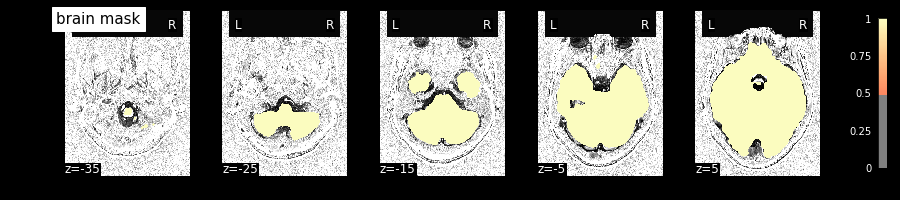

In [12]:
plot_stat_map(
    mask, title='brain mask',  cmap=plt.cm.magma,
    threshold=0.5, bg_img=anat, display_mode='z', cut_coords=range(-35, 15, 10), dim=-1);

In [13]:
from nilearn.plotting import plot_epi
mask_preproc = output + 'ses-1/func/sub-01_ses-1_task-rest_acq-fullbrain_run-1_bold_space-T1w_brainmask.nii.gz'
preproc = output + 'ses-1/func/sub-01_ses-1_task-rest_acq-fullbrain_run-1_bold_space-T1w_preproc.nii.gz'


In [35]:
print(image.load_img(preproc).shape)
array = np.array(range(10, 20))
func = image.index_img(preproc, 4)
func1 = image.index_img(preproc, array)
print(func.shape)


(94, 123, 89, 300)
(94, 123, 89)


In [37]:
print(func1.shape)

(94, 123, 89, 10)


In [33]:
np.array?

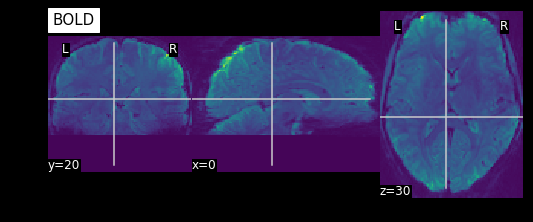

In [46]:

plot_epi(func,
         title='BOLD', display_mode='ortho', cut_coords=(0, 20, 30),
         cmap=plt.cm.viridis);

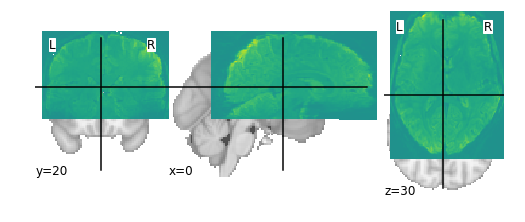

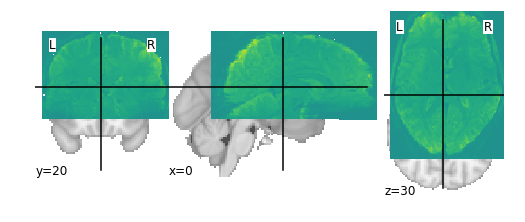

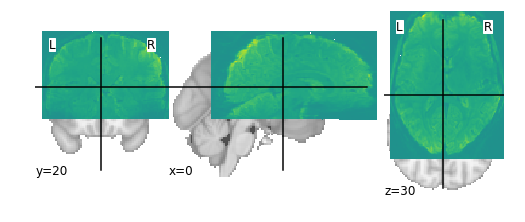

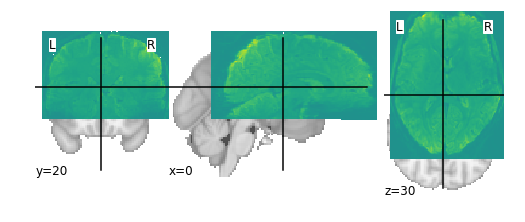

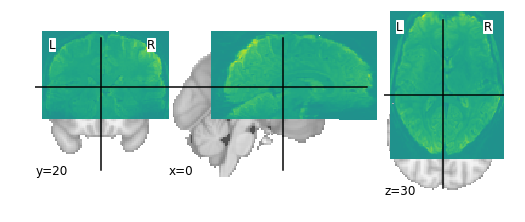

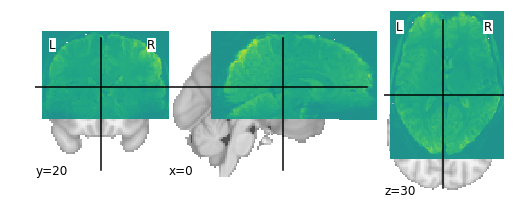

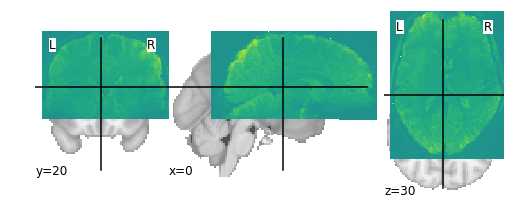

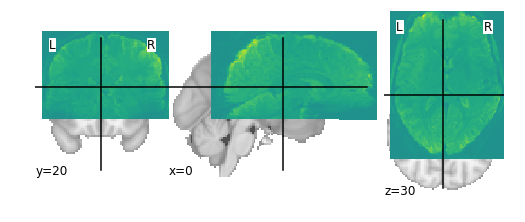

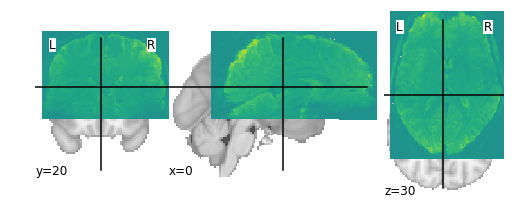

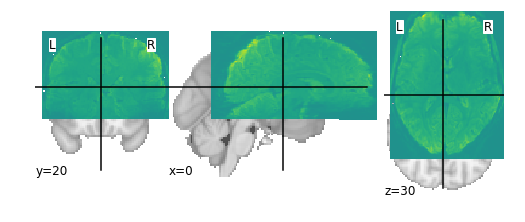

In [48]:
for img in image.iter_img(func1):
    # img is now an in-memory 3D img
    plot_stat_map(img, threshold=3, display_mode='ortho', cut_coords=(0, 20, 30),
                           colorbar=False, cmap=plt.cm.viridis)

/home/desgab/.local/easybuild/software/2017/Core/miniconda3/4.3.27/envs/nilearn/lib/python3.6/site-packages/matplotlib/contour.py:902: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/home/desgab/.local/easybuild/software/2017/Core/miniconda3/4.3.27/envs/nilearn/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


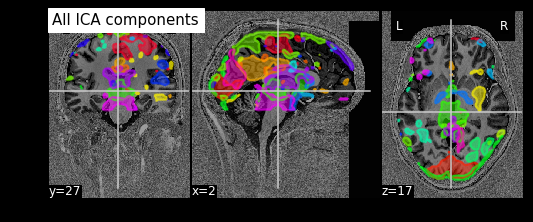

In [99]:
#plausible components: 1 (visual cortex) 2 (cingulate) 3 (DMN) 5 (parieto-frontal) 9 (right parietal) 
#10 (left hem over right hem?)
#unsure: 4 (right over left hem?) 6 
#less plausible components: 0 7 (ventricles) 8 (artifact)

from nilearn.plotting import plot_prob_atlas

components_img1 = 'run1_canica_resting_state.nii.gz'

# Plot all ICA components together
display = plot_prob_atlas(components_img, bg_img=anat, title='All ICA components')


/home/desgab/.local/easybuild/software/2017/Core/miniconda3/4.3.27/envs/nilearn/lib/python3.6/site-packages/matplotlib/contour.py:902: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/home/desgab/.local/easybuild/software/2017/Core/miniconda3/4.3.27/envs/nilearn/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


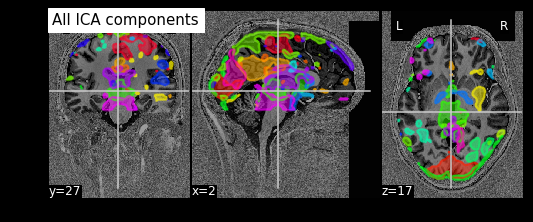

In [100]:
#plausible components: 3 (DMN?) 4 5 6 8 (visual cortex) 19
#unsure: 1 2 10
#less plausible components: 0 7(ventricles) 9
components_img2 = 'run2_canica_resting_state.nii.gz'

display = plot_prob_atlas(components_img, bg_img=anat, title='All ICA components')


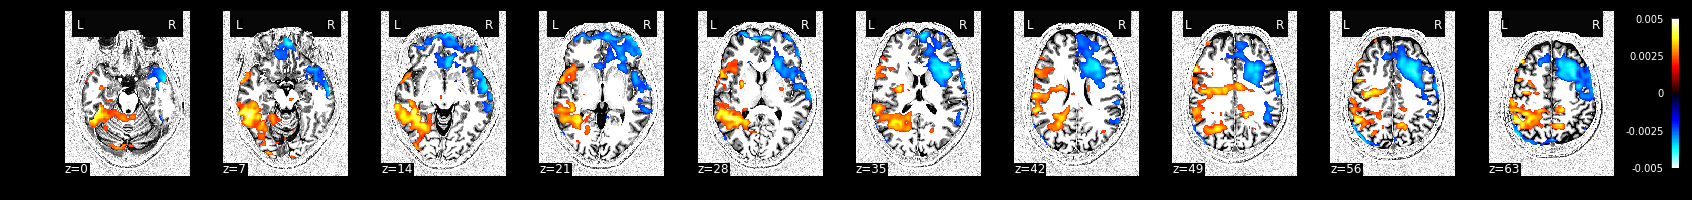

In [97]:
from nilearn import plotting
display = plot_stat_map(image.index_img(components_img, 10), bg_img=anat,
                        display_mode='z', cut_coords=range(0, 70, 7), dim=-1)


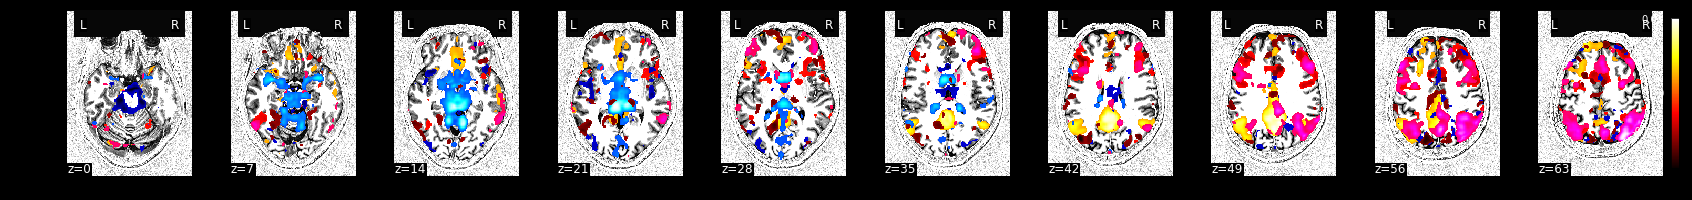

In [104]:
from nilearn import plotting
display = plot_stat_map(image.index_img(components_img1, 3), bg_img=anat,
                        display_mode='z', cut_coords=range(0, 70, 7), dim=-1, cmap=plotting.cm.black_red)
display.add_overlay(image.index_img(components_img1, 7),
                    cmap=plotting.cm.black_blue)
display.add_overlay(image.index_img(components_img1, 5),
                    cmap=plotting.cm.black_pink)


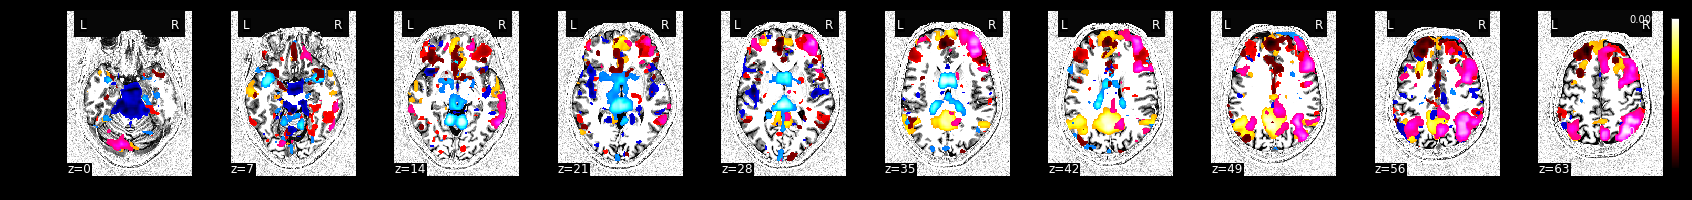

In [106]:
from nilearn import plotting
display = plot_stat_map(image.index_img(components_img2, 3), bg_img=anat,
                        display_mode='z', cut_coords=range(0, 70, 7), dim=-1, cmap=plotting.cm.black_red)
display.add_overlay(image.index_img(components_img2, 7),
                    cmap=plotting.cm.black_blue)
display.add_overlay(image.index_img(components_img2, 5),
                    cmap=plotting.cm.black_pink)
